In [1]:
import os
import wget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import joblib
import pickle

In [2]:
file = 'carprices.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/6_train_test_split/carprices.csv', file)

file exists


In [3]:
df = pd.read_csv(file)
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [4]:
df.columns = df.columns.str.lower().str.replace('[$,(,)," "]','')

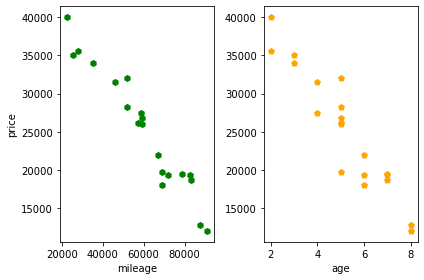

In [5]:
%matplotlib inline
plt.subplot(1,2,1)
plt.scatter(df['mileage'], df['sellprice'], marker='h', color='green')
plt.xlabel('mileage')
plt.ylabel('price')
plt.subplot(1,2,2)
plt.scatter(df['ageyrs'], df['sellprice'], marker='p', color='orange')
plt.xlabel('age')
plt.tight_layout()

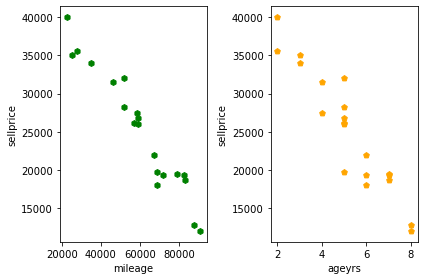

In [6]:
fig, axes = plt.subplots(ncols=2)
df.plot('mileage','sellprice',kind='scatter', ax=axes[0], color='green', marker='h', s=35)
df.plot('ageyrs','sellprice',kind='scatter', ax=axes[1], color='orange', marker='p', s=35)
plt.tight_layout()

In [7]:
X = df.drop(columns=['sellprice'])
y = df['sellprice']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 12)

In [9]:
lreg = linear_model.LinearRegression()
lreg.fit(X_train,y_train)
lreg.predict(X_test)

array([28123.40722582, 25271.16142469, 22586.45235388, 20660.55688256])

In [10]:
lreg.score(X_test, y_test)

0.8713685763163667

In [11]:
df['predicted_price'] = pd.Series(lreg.predict(X))

In [12]:
df

,mileage,ageyrs,sellprice,predicted_price
0,69000,6,18000,21816.094165
1,35000,3,34000,34189.988744
2,57000,5,26100,26197.511754
3,22500,2,40000,38763.995881
4,46000,4,31500,30193.750249
5,59000,5,26750,25427.153566
6,52000,5,32000,28123.407226
7,72000,6,19300,20660.556883
8,91000,8,12000,13823.617176
9,67000,6,22000,22586.452354


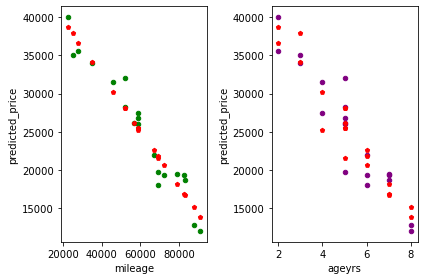

In [13]:
fig, axes = plt.subplots(ncols=2)
df.plot('mileage','sellprice', ax = axes[0], kind='scatter', color='green')
df.plot('mileage','predicted_price', ax = axes[0], kind='scatter', color ='red', marker = 'p')
df.plot('ageyrs','sellprice', ax = axes[1], kind='scatter', color='purple')
df.plot('ageyrs','predicted_price', ax = axes[1], kind='scatter', color ='red', marker = 'p')
plt.tight_layout()